# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
df = 1
chi_rv = sts.chi(df)
sample = chi_rv.rvs(100)
sample

array([0.24898272, 1.29568266, 1.08760284, 0.04375107, 0.11415454,
       0.08357657, 0.78326877, 0.07693578, 2.44249137, 1.44706115,
       0.31138775, 0.4953869 , 1.45123188, 0.13326919, 1.08510373,
       0.24354476, 1.22590396, 0.27849764, 0.57040666, 0.20398345,
       1.08479358, 0.71095587, 1.83976591, 0.2262538 , 0.8330345 ,
       0.31947788, 1.17857881, 0.59578974, 0.87289208, 0.03038466,
       0.81883258, 1.06731518, 2.51837862, 0.46010616, 0.66334869,
       0.75937248, 0.59965815, 0.37295209, 1.80560007, 0.04410999,
       0.0030566 , 0.08422069, 0.48591634, 1.30029105, 0.75702935,
       0.02509085, 0.67745311, 0.92987599, 0.96136009, 0.5298546 ,
       0.75685603, 1.2794463 , 0.09708684, 1.25285378, 0.18771145,
       0.79994756, 0.40366874, 1.38103617, 0.30788785, 0.18204026,
       0.81068305, 0.37620539, 2.04546618, 1.51045051, 0.15343215,
       0.90305471, 0.68050831, 1.08145566, 0.6493075 , 1.52119757,
       0.70106526, 0.31369684, 0.68075162, 0.8421088 , 1.00754

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = chi_rv.mean() # настоящее среднее случайной величины
real_mean

0.7978845608028655

In [5]:
real_var = chi_rv.var() # настоящая дисперсия случайной величины
real_var

0.3633802276324184

### Постройте гистограмму выборки и теоретическую плотность распределения

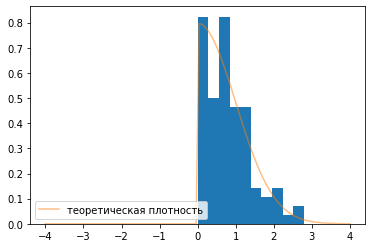

In [6]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = chi_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.8166374427352845
0.3753974855157848


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

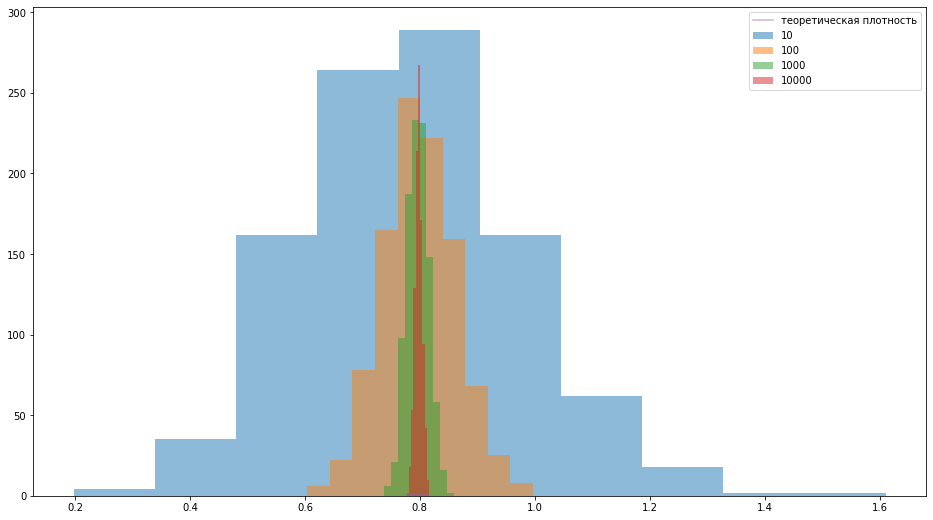

In [8]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(chi_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
    
x = np.linspace(min(means), max(means), 100)
pdf = chi_rv.pdf(x)
plt.plot(x, pdf, alpha=0.5)
plt.legend(['теоретическая плотность', '10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Если говорить про Центральную предельную теорему, в которой говорится, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы, имеет распределение, близкое к нормальному, то тут все хорошо - распределения близки к нормальным

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [3]:
# либо загружаем из альтернативного хранилища
url = "https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df = pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
c_data = df.loc[df['churn'] == True]['total day calls']
c_data # выборка тех, кто ушел

10      137
15       67
21       89
33      118
41       85
       ... 
3301    113
3304    114
3320    101
3322    105
3323    126
Name: total day calls, Length: 483, dtype: int64

(array([  1.,   0.,   7.,  17.,  59., 118., 154.,  94.,  29.,   4.]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

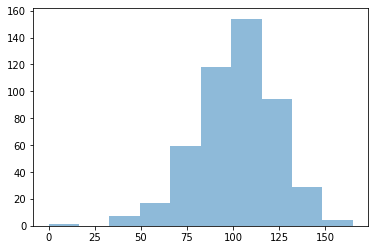

In [5]:
plt.hist(c_data, alpha=0.5)

In [6]:
c_data.mean() # среднее тех, кто ушел

101.33540372670808

In [7]:
c_data.var() # выборочная дисперсия тех, кто ушел

465.79598463957115

In [8]:
n_c_data = df.loc[df['churn'] == False]['total day calls']
n_c_data # выборка тех, кто остался

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: total day calls, Length: 2850, dtype: int64

(array([  1.,   1.,  10., 101., 378., 772., 916., 492., 154.,  25.]),
 array([  0. ,  16.3,  32.6,  48.9,  65.2,  81.5,  97.8, 114.1, 130.4,
        146.7, 163. ]),
 <BarContainer object of 10 artists>)

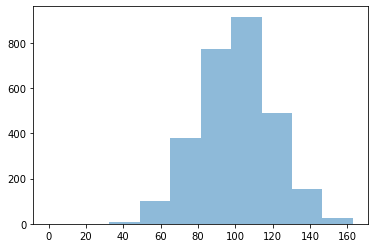

In [9]:
plt.hist(n_c_data, alpha=0.5)

In [10]:
n_c_data.mean() # среднее тех, кто остался

100.28315789473685

In [11]:
n_c_data.var()# выборочная дисперсия тех, кто остался

392.08581663003537

In [14]:
z = 1.96

print("Для ушедших доверительный интервал: [{}, {}] ".format(
    c_data.mean() - z * np.sqrt(c_data.var()) / np.sqrt(len(c_data)), c_data.mean() + z * np.sqrt(c_data.var()) / np.sqrt(len(c_data)) 
))
print("Для оставшихся доверительный интервал: [{}, {}] ".format(
    n_c_data.mean() - z * np.sqrt(n_c_data.var()) / np.sqrt(len(n_c_data)), n_c_data.mean() + z * np.sqrt(n_c_data.var()) / np.sqrt(len(n_c_data)) 
))
print("Для ушедших доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(c_data),  np.std(c_data, ddof=1), alpha=0.95, alternative='two-sided')
))
print("Для оставшихся доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(n_c_data),  np.std(n_c_data, ddof=1), alpha=0.95, alternative='two-sided')
))

Для ушедших доверительный интервал: [99.41062692289533, 103.26018053052083] 
Для оставшихся доверительный интервал: [99.55617497470149, 101.0101408147722] 
Для ушедших доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
Для оставшихся доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
